In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from urllib.request import urlretrieve

In [ ]:
urlretrieve("https://raw.githubusercontent.com/tempoloud/mlrecord/main/kmeans.csv","./driver-data.csv")

('./driver-data.csv', <http.client.HTTPMessage at 0x7c02adf98820>)

In [ ]:
df=pd.read_csv("./driver-data.csv")

In [ ]:
df = df.drop('id',axis='columns')

In [ ]:
df.head()

,mean_dist_day,mean_over_speed_perc,cluster
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0


In [ ]:
df.isnull().sum(axis=0)

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

Text(0, 0.5, 'mean_over_speed_perc')

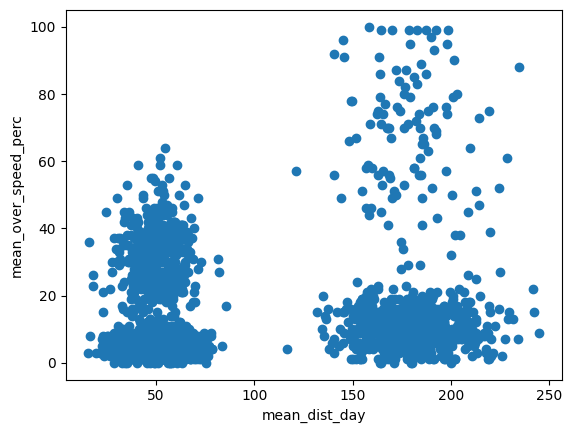

In [ ]:
plt.scatter(df['mean_dist_day'],df['mean_over_speed_perc'])
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['mean_dist_day','mean_over_speed_perc']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
df['cluster']=y_predicted

In [ ]:
km.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154]])

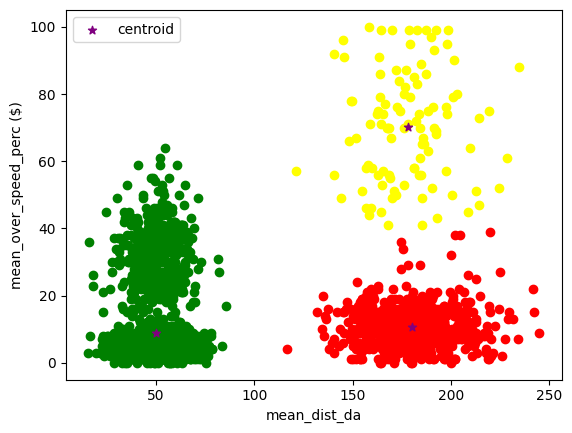

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'],color='green')
plt.scatter(df2['mean_dist_day'],df2['mean_over_speed_perc'],color='red')
plt.scatter(df3['mean_dist_day'],df3['mean_over_speed_perc'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('mean_dist_da')
plt.ylabel('mean_over_speed_perc ($)')
plt.legend()

In [ ]:
import warnings
warnings.filterwarnings ('ignore')
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['mean_dist_day','mean_over_speed_perc']])
    sse.append(km.inertia_)


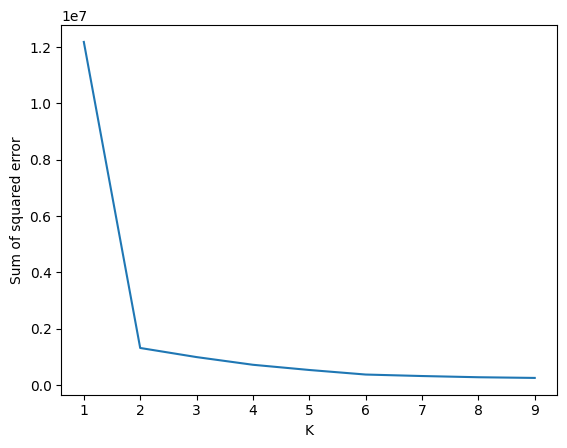

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
urlretrieve("https://raw.githubusercontent.com/tempoloud/mlrecord/main/credit.csv","./data.csv")

HTTPError: ignored